# 1. Business Understanding

From Kaggle: (https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster)
## Dataset Description

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: 

Frequent consumption of high caloric food (FAVC), 

Frequency of consumption of vegetables (FCVC), 

Number of main meals (NCP), 

Consumption of food between meals (CAEC), 

Consumption of water daily (CH20), and 

Consumption of alcohol (CALC). 

The attributes related with the physical condition are: 

Calories consumption monitoring (SCC), 

Physical activity frequency (FAF), 

Time using technology devices (TUE), 

Transportation used (MTRANS)

variables obtained :

Gender, Age, Height and Weight.

NObesity values are:

•Underweight Less than 18.5
•Normal 18.5 to 24.9
•Overweight 25.0 to 29.9
•Obesity I 30.0 to 34.9
•Obesity II 35.0 to 39.9
•Obesity III Higher than 40

The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format.

Files
train.csv - the training dataset; NObeyesdad is the categorical target
test.csv - the test dataset; your objective is to predict the class of NObeyesdad for each row

# 2. Data Understanding

In [2]:
import pickle

# Importing Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Scoring
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# Transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier

#Tunning
from sklearn.model_selection import GridSearchCV

# Keep the output as a DataFrame pandas
from sklearn import set_config
set_config(transform_output='pandas')



In [3]:
import streamlit as st

In [4]:
def get_metrics(y_true, y_pred):
    dict_metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        #'Precision': precision_score(y_true, y_pred),
        #'Recall': recall_score(y_true, y_pred),
        #'F1': f1_score(y_true, y_pred),
        #'RAUC': roc_auc_score(y_true, y_pred)
    }
    return dict_metrics

In [5]:
# Importing Datasets

df_train = pd.read_csv('../data/train.csv')

Let's explore the dataset:

In [6]:
df_train

id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.880534  1.411685   Sometimes   
3                                yes  yes  3.000000  3.000000   Sometimes   
4                                yes  yes  2.679664  1.971472   Sometimes   
...                              ...  ...       ...       ...         ...   
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
0        no  2.763573  no  0.000000  0.976473  Sometimes   
1        no  2.000000  no  1.000000  1.000000         no   
2        no  1.910378  no  0.866045  1.673584         no   
3        no  1.674061  no  1.467863  0.780199  Sometimes   
4        no  1.979848  no  1.967973  0.931721  Sometimes   
...     ...       ...  ..       ...       ...        ...   
20753    no  2.151809  no  1.330519  0.196680  Sometimes   
20754    no  1.000000  no  2.000000  1.000000  Sometimes   
20755    no  2.000000  no  1.158040  1.198439         no   
20756    no  2.144838  no  0.000000  0.973834         no   
20757    no  2.003563  no  0.684487  0.713823  Sometimes   

                      MTRANS           NObeyesdad  
0      Public_Transportation  Overweight_Level_II  
1                 Automobile        Normal_Weight  
2      Public_Transportation  Insufficient_Weight  
3      Public_Transportation     Obesity_Type_III  
4      Public_Transportation  Overweight_Level_II  
...                      ...                  ...  
20753  Public_Transportation      Obesity_Type_II  
20754  Public_Transportation  Insufficient_Weight  
20755  Public_Transportation      Obesity_Type_II  
20756             Automobile  Overweight_Level_II  
20757  Public_Transportation      Obesity_Type_II  

[20758 rows x 18 columns]

In [7]:
df_train.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [9]:
df_train['NObeyesdad'].value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

In [10]:
df_train.groupby(['NObeyesdad'])['Weight'].agg('mean').reset_index()

NObeyesdad      Weight
0  Insufficient_Weight   49.860773
1        Normal_Weight   61.533289
2       Obesity_Type_I   92.371026
3      Obesity_Type_II  115.995914
4     Obesity_Type_III  117.697452
5   Overweight_Level_I   74.228266
6  Overweight_Level_II   82.085513

In [11]:
df_train.groupby(['MTRANS'])['Weight'].agg('mean').reset_index()

MTRANS     Weight
0             Automobile  87.766698
1                   Bike  73.278918
2              Motorbike  73.635865
3  Public_Transportation  88.457081
4                Walking  70.621798

In [12]:
desired_order = ['Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_I', 'Overweight_Level_II', 'Overweight_Level_I', 'Normal_Weight', 'Insufficient_Weight']

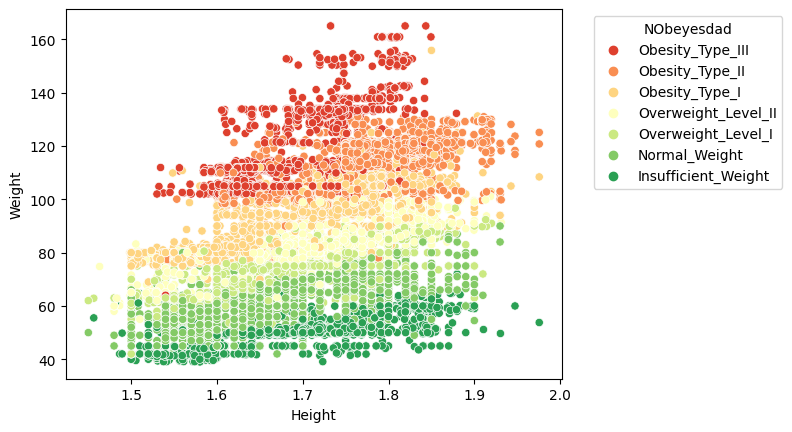

In [13]:
sns.scatterplot(x = 'Height', y = 'Weight', data = df_train, hue = 'NObeyesdad', palette='RdYlGn', hue_order = desired_order)

plt.legend(title='NObeyesdad', bbox_to_anchor=(1.05, 1), loc='upper left');

Next, let's evaluate the BMI value.



## Calculating the BMI

BMI stands for *Body Mass Index*. It is a measurement that uses an individual's height and weight to assess whether they fall within healthy weight ranges.

The BMI formula is as follows:

$$ BMI = \frac{{\text{weight in kilograms}}}{{(\text{height in meters})^2}} $$

The BMI result is often categorized into ranges indicating whether a person is underweight, normal weight, overweight, or obese. However, it's important to note that BMI has limitations as it does not consider factors such as body fat distribution, body composition, or other health-relevant aspects. While BMI is a useful tool for population assessments, it is not a perfect measure for individual health. Clinical context and guidance from healthcare professionals are essential for a comprehensive evaluation.

In [14]:
# Calculating BMI

df_BMI = df_train.copy()

df_BMI['BMI'] = df_BMI['Weight'] / (df_BMI['Height'] * df_BMI['Height'])

df_BMI

id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.880534  1.411685   Sometimes   
3                                yes  yes  3.000000  3.000000   Sometimes   
4                                yes  yes  2.679664  1.971472   Sometimes   
...                              ...  ...       ...       ...         ...   
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
0        no  2.763573  no  0.000000  0.976473  Sometimes   
1        no  2.000000  no  1.000000  1.000000         no   
2        no  1.910378  no  0.866045  1.673584         no   
3        no  1.674061  no  1.467863  0.780199  Sometimes   
4        no  1.979848  no  1.967973  0.931721  Sometimes   
...     ...       ...  ..       ...       ...        ...   
20753    no  2.151809  no  1.330519  0.196680  Sometimes   
20754    no  1.000000  no  2.000000  1.000000  Sometimes   
20755    no  2.000000  no  1.158040  1.198439         no   
20756    no  2.144838  no  0.000000  0.973834         no   
20757    no  2.003563  no  0.684487  0.713823  Sometimes   

                      MTRANS           NObeyesdad        BMI  
0      Public_Transportation  Overweight_Level_II  28.259565  
1                 Automobile        Normal_Weight  23.422091  
2      Public_Transportation  Insufficient_Weight  17.126706  
3      Public_Transportation     Obesity_Type_III  44.855798  
4      Public_Transportation  Overweight_Level_II  25.599151  
...                      ...                  ...        ...  
20753  Public_Transportation      Obesity_Type_II  36.587084  
20754  Public_Transportation  Insufficient_Weight  17.099278  
20755  Public_Transportation      Obesity_Type_II  31.889841  
20756             Automobile  Overweight_Level_II  28.899693  
20757  Public_Transportation      Obesity_Type_II  35.800157  

[20758 rows x 19 columns]

We can evaluate the obesity level by the value of the BMI:

- Insufficient_Weight Less than 18.5
- Normal_Weight from 18.5 to 24.9
- Overweight_Level_I from 25.0 to 27.4
- Overweight_Level_II from 27.5 to 29.9
- Obesity_Type_I from 30.0 to 34.9
- Obesity_Type_II from 35.0 to 39.0
- Obesity_Type_III Higher than 40

In [15]:
df_BMI['NObeyesdad_2'] = ""

for i in range(df_BMI.shape[0]):
    if df_BMI['BMI'][i] < 18.5:
        df_BMI.loc[i, "NObeyesdad_2"] = 'Insufficient_Weight'
    elif df_BMI['BMI'][i] < 25.0:
        df_BMI.loc[i, "NObeyesdad_2"] = 'Normal_Weight'
    elif df_BMI['BMI'][i] < 27.4:
        df_BMI.loc[i, "NObeyesdad_2"] = 'Overweight_Level_I'
    elif df_BMI['BMI'][i] < 30.0:
        df_BMI.loc[i, "NObeyesdad_2"] = 'Overweight_Level_II'
    elif df_BMI['BMI'][i] < 35.0:
        df_BMI.loc[i, "NObeyesdad_2"] = 'Obesity_Type_I'
    elif df_BMI['BMI'][i] < 40.0:
        df_BMI.loc[i, "NObeyesdad_2"] = 'Obesity_Type_II'
    elif df_BMI['BMI'][i] > 40.0:
        df_BMI.loc[i, "NObeyesdad_2"] = 'Obesity_Type_III'
df_BMI

id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.880534  1.411685   Sometimes   
3                                yes  yes  3.000000  3.000000   Sometimes   
4                                yes  yes  2.679664  1.971472   Sometimes   
...                              ...  ...       ...       ...         ...   
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
0        no  2.763573  no  0.000000  0.976473  Sometimes   
1        no  2.000000  no  1.000000  1.000000         no   
2        no  1.910378  no  0.866045  1.673584         no   
3        no  1.674061  no  1.467863  0.780199  Sometimes   
4        no  1.979848  no  1.967973  0.931721  Sometimes   
...     ...       ...  ..       ...       ...        ...   
20753    no  2.151809  no  1.330519  0.196680  Sometimes   
20754    no  1.000000  no  2.000000  1.000000  Sometimes   
20755    no  2.000000  no  1.158040  1.198439         no   
20756    no  2.144838  no  0.000000  0.973834         no   
20757    no  2.003563  no  0.684487  0.713823  Sometimes   

                      MTRANS           NObeyesdad        BMI  \
0      Public_Transportation  Overweight_Level_II  28.259565   
1                 Automobile        Normal_Weight  23.422091   
2      Public_Transportation  Insufficient_Weight  17.126706   
3      Public_Transportation     Obesity_Type_III  44.855798   
4      Public_Transportation  Overweight_Level_II  25.599151   
...                      ...                  ...        ...   
20753  Public_Transportation      Obesity_Type_II  36.587084   
20754  Public_Transportation  Insufficient_Weight  17.099278   
20755  Public_Transportation      Obesity_Type_II  31.889841   
20756             Automobile  Overweight_Level_II  28.899693   
20757  Public_Transportation      Obesity_Type_II  35.800157   

              NObeyesdad_2  
0      Overweight_Level_II  
1            Normal_Weight  
2      Insufficient_Weight  
3         Obesity_Type_III  
4       Overweight_Level_I  
...                    ...  
20753      Obesity_Type_II  
20754  Insufficient_Weight  
20755       Obesity_Type_I  
20756  Overweight_Level_II  
20757      Obesity_Type_II  

[20758 rows x 20 columns]

Now let's compare the BMI classification with the original classification from the Dataset

In [16]:
pred_BMI = df_BMI['NObeyesdad_2']
y_test = df_BMI['NObeyesdad']

print('BMI accuracy: {}'.format(accuracy_score(y_test, pred_BMI)))

BMI accuracy: 0.7764717217458329


Based only on BMI values we can get an accuracy comparing to the original Dataset. To optimize the values we can remap the BMI to get a better result

In [17]:
df_BMI['NObeyesdad_2'] = ""

for i in range(df_BMI.shape[0]):
    if df_BMI['BMI'][i] < 18.5: # Optimal
        df_BMI.loc[i, "NObeyesdad_2"] = 'Insufficient_Weight'
    elif df_BMI['BMI'][i] < 25.0: # Optimal
        df_BMI.loc[i, "NObeyesdad_2"] = 'Normal_Weight'
    elif df_BMI['BMI'][i] < 26.9: # Optimal
        df_BMI.loc[i, "NObeyesdad_2"] = 'Overweight_Level_I'
    elif df_BMI['BMI'][i] < 30.0: # Optimal
        df_BMI.loc[i, "NObeyesdad_2"] = 'Overweight_Level_II'
    elif df_BMI['BMI'][i] < 34.3: # Optimal
        df_BMI.loc[i, "NObeyesdad_2"] = 'Obesity_Type_I'
    elif df_BMI['BMI'][i] < 39.2: # Optimal
        df_BMI.loc[i, "NObeyesdad_2"] = 'Obesity_Type_II'
    elif df_BMI['BMI'][i] > 39.2: # Optimal
        df_BMI.loc[i, "NObeyesdad_2"] = 'Obesity_Type_III'

In [18]:
pred_BMI = df_BMI['NObeyesdad_2']
y_test = df_BMI['NObeyesdad']

print('BMI accuracy: {}'.format(accuracy_score(y_test, pred_BMI)))

BMI accuracy: 0.8065324212351864


With optimized mapping we get 80,6% accuracy based only on BMI value.

Let's compare the BMI mapping with the original NObeyesdad from dataset

In [19]:
# Function to map the features based on a variable
def map_features(df, feature = '', comparison = ''):

    df_ordered = df.groupby([feature])[comparison].agg('mean').sort_values(ascending = True).reset_index()
    values = df_ordered.index
    features = df_ordered[feature]
    feature_mappings = {}
    for i in range(values.shape[0]):
        feature_mappings[features[i]] = values[i]
    print(f"{feature} mapping: {feature_mappings}")
    return feature_mappings

In [20]:
#Dictionary to map the NObeyesdad
NOB_mappings = map_features(feature = 'NObeyesdad', comparison = 'BMI', df = df_BMI)

NObeyesdad mapping: {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}


In [21]:
df_map = df_BMI.copy()
df_map['NObeyesdad'] = df_BMI['NObeyesdad'].map(NOB_mappings)
df_map['NObeyesdad_2'] = df_BMI['NObeyesdad_2'].map(NOB_mappings)
df_map

id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.880534  1.411685   Sometimes   
3                                yes  yes  3.000000  3.000000   Sometimes   
4                                yes  yes  2.679664  1.971472   Sometimes   
...                              ...  ...       ...       ...         ...   
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
0        no  2.763573  no  0.000000  0.976473  Sometimes   
1        no  2.000000  no  1.000000  1.000000         no   
2        no  1.910378  no  0.866045  1.673584         no   
3        no  1.674061  no  1.467863  0.780199  Sometimes   
4        no  1.979848  no  1.967973  0.931721  Sometimes   
...     ...       ...  ..       ...       ...        ...   
20753    no  2.151809  no  1.330519  0.196680  Sometimes   
20754    no  1.000000  no  2.000000  1.000000  Sometimes   
20755    no  2.000000  no  1.158040  1.198439         no   
20756    no  2.144838  no  0.000000  0.973834         no   
20757    no  2.003563  no  0.684487  0.713823  Sometimes   

                      MTRANS  NObeyesdad        BMI  NObeyesdad_2  
0      Public_Transportation           3  28.259565             3  
1                 Automobile           1  23.422091             1  
2      Public_Transportation           0  17.126706             0  
3      Public_Transportation           6  44.855798             6  
4      Public_Transportation           3  25.599151             2  
...                      ...         ...        ...           ...  
20753  Public_Transportation           5  36.587084             5  
20754  Public_Transportation           0  17.099278             0  
20755  Public_Transportation           5  31.889841             4  
20756             Automobile           3  28.899693             3  
20757  Public_Transportation           5  35.800157             5  

[20758 rows x 20 columns]

Next, we compare the differences between the NObeyesdad_2 and NObeyesdad

In [22]:
df_map['DIF'] = df_map['NObeyesdad'] - df_map['NObeyesdad_2']

df_map

id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.880534  1.411685   Sometimes   
3                                yes  yes  3.000000  3.000000   Sometimes   
4                                yes  yes  2.679664  1.971472   Sometimes   
...                              ...  ...       ...       ...         ...   
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

       ...      CH2O  SCC       FAF       TUE       CALC  \
0      ...  2.763573   no  0.000000  0.976473  Sometimes   
1      ...  2.000000   no  1.000000  1.000000         no   
2      ...  1.910378   no  0.866045  1.673584         no   
3      ...  1.674061   no  1.467863  0.780199  Sometimes   
4      ...  1.979848   no  1.967973  0.931721  Sometimes   
...    ...       ...  ...       ...       ...        ...   
20753  ...  2.151809   no  1.330519  0.196680  Sometimes   
20754  ...  1.000000   no  2.000000  1.000000  Sometimes   
20755  ...  2.000000   no  1.158040  1.198439         no   
20756  ...  2.144838   no  0.000000  0.973834         no   
20757  ...  2.003563   no  0.684487  0.713823  Sometimes   

                      MTRANS NObeyesdad        BMI  NObeyesdad_2  DIF  
0      Public_Transportation          3  28.259565             3    0  
1                 Automobile          1  23.422091             1    0  
2      Public_Transportation          0  17.126706             0    0  
3      Public_Transportation          6  44.855798             6    0  
4      Public_Transportation          3  25.599151             2    1  
...                      ...        ...        ...           ...  ...  
20753  Public_Transportation          5  36.587084             5    0  
20754  Public_Transportation          0  17.099278             0    0  
20755  Public_Transportation          5  31.889841             4    1  
20756             Automobile          3  28.899693             3    0  
20757  Public_Transportation          5  35.800157             5    0  

[20758 rows x 21 columns]

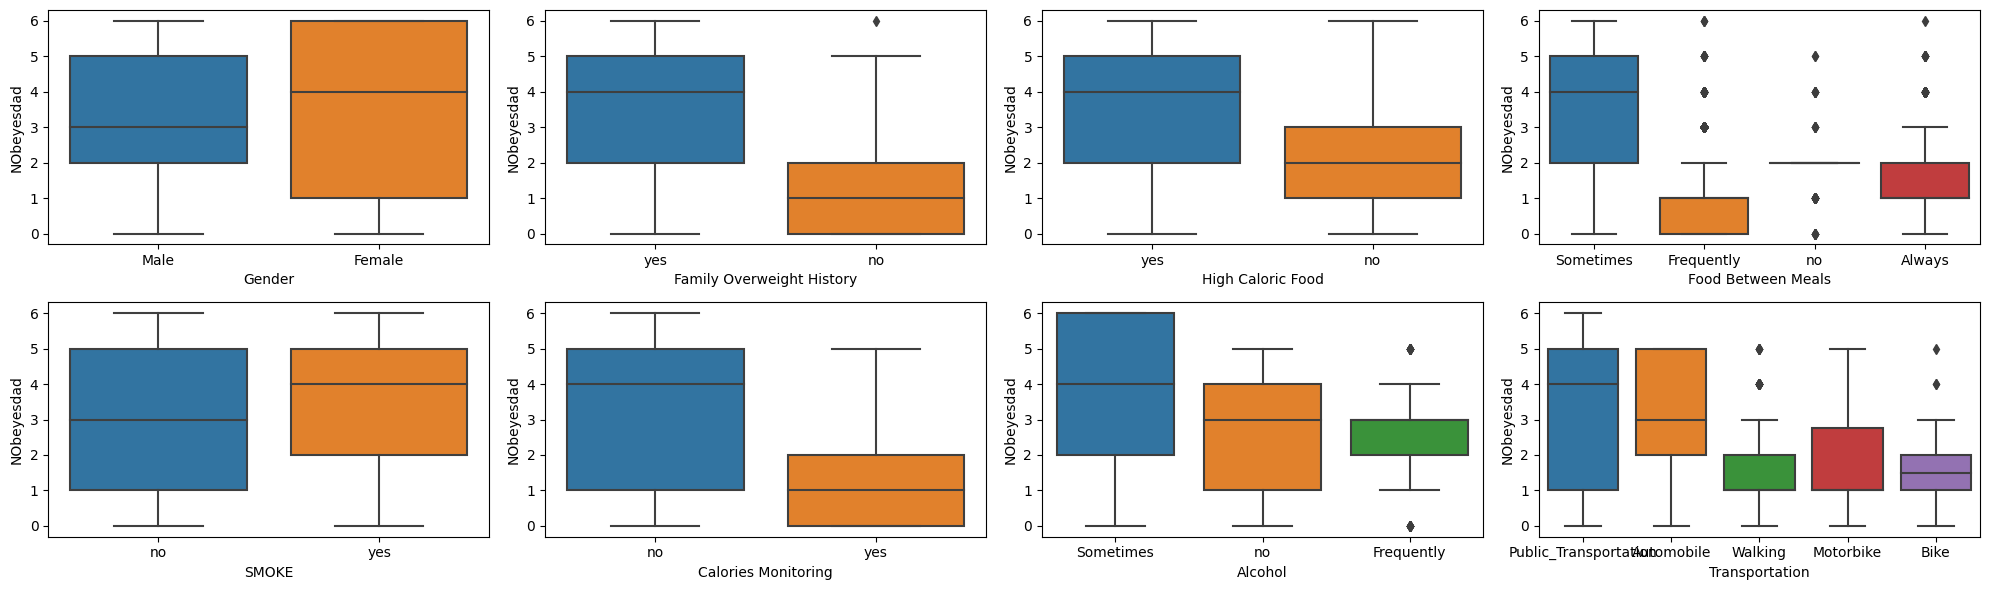

In [23]:
cat_plot_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
labels = ['Gender', 'Family Overweight History', 'High Caloric Food', 'Food Between Meals', 'SMOKE', 'Calories Monitoring', 'Alcohol', 'Transportation']

f, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 6))
for col, ax in zip(cat_plot_cols, axes.flatten()):
    sns.boxplot(x=col, y = 'NObeyesdad', data = df_map, ax = ax)

for ax, col in zip(axes.flatten(), labels):
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

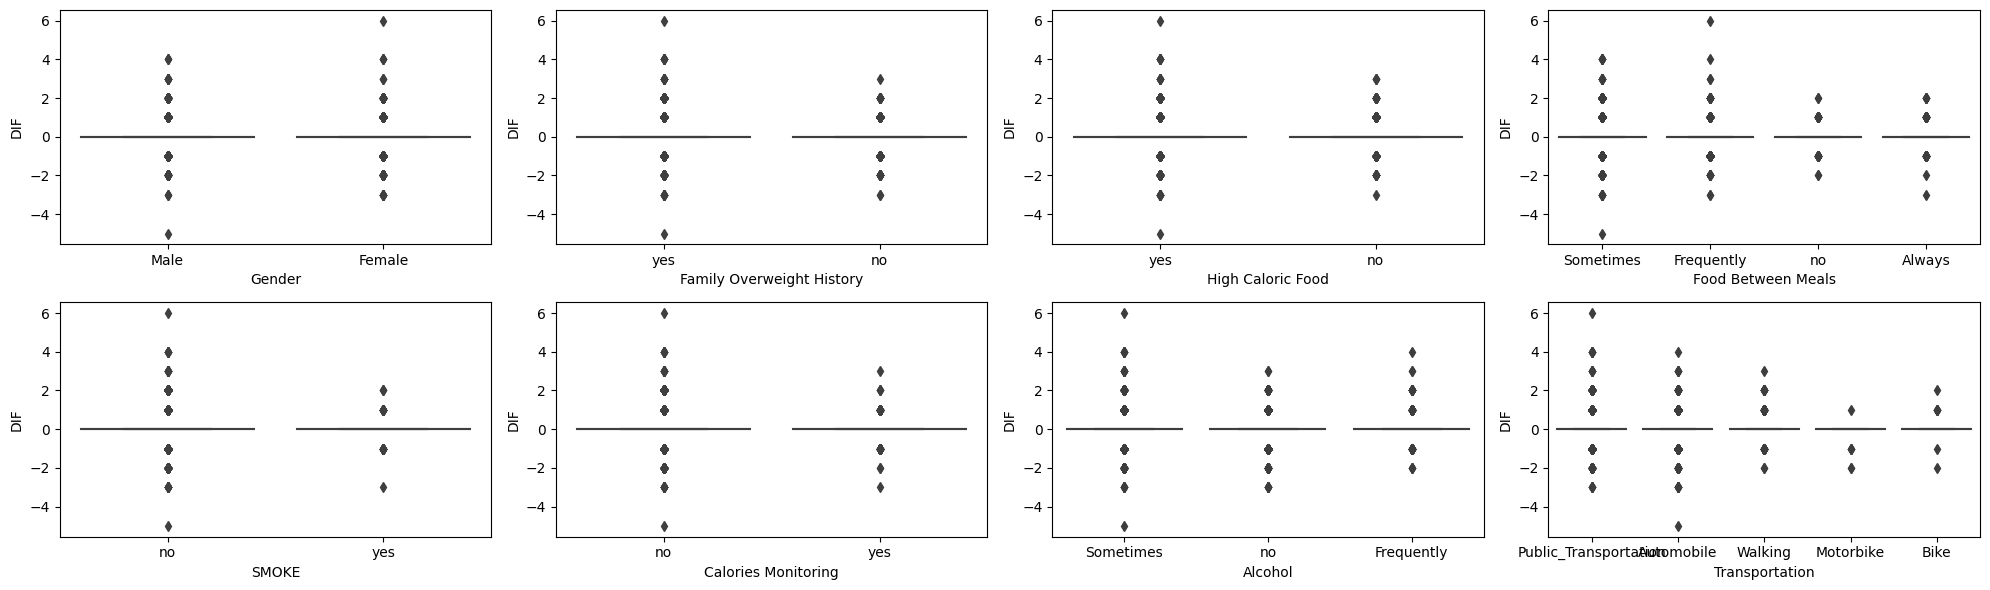

In [24]:
cat_plot_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
labels = ['Gender', 'Family Overweight History', 'High Caloric Food', 'Food Between Meals', 'SMOKE', 'Calories Monitoring', 'Alcohol', 'Transportation']

f, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 6))
for col, ax in zip(cat_plot_cols, axes.flatten()):
    sns.boxplot(x=col, y = 'DIF', data = df_map, ax = ax)

for ax, col in zip(axes.flatten(), labels):
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

C:\Users\Pedro Natanael\AppData\Local\Temp\ipykernel_11980\2958653638.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfc = df_map.corr()


<Axes: >

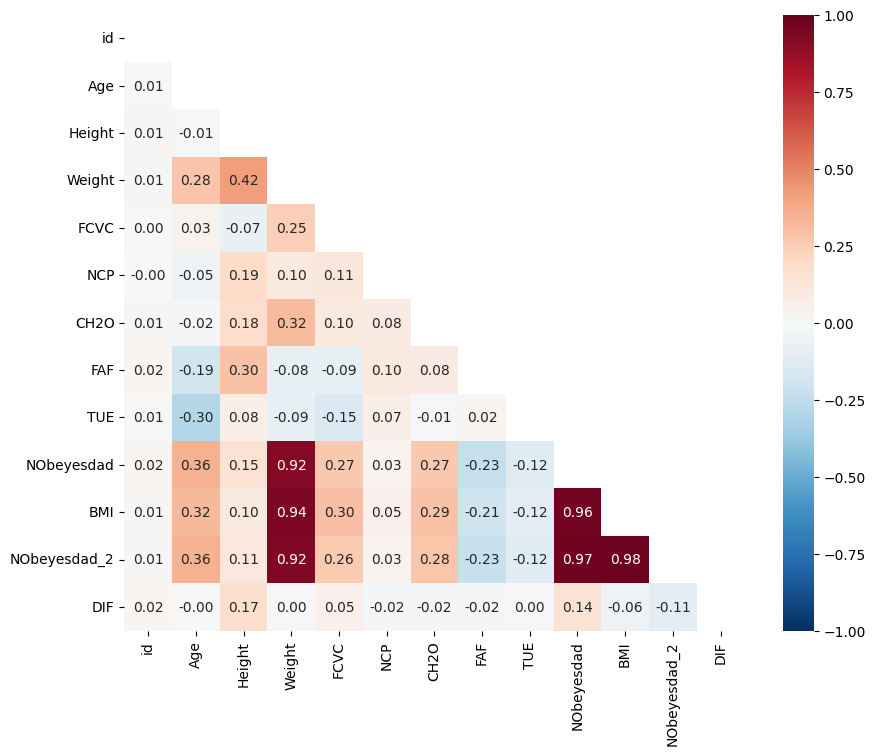

In [25]:
dfc = df_map.corr()
mask = np.zeros(dfc.shape).astype(bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 8))
sns.heatmap(dfc, annot=True, fmt = '.2f', center = 0, vmax = 1, vmin = -1, cmap = 'RdBu_r', mask = mask)

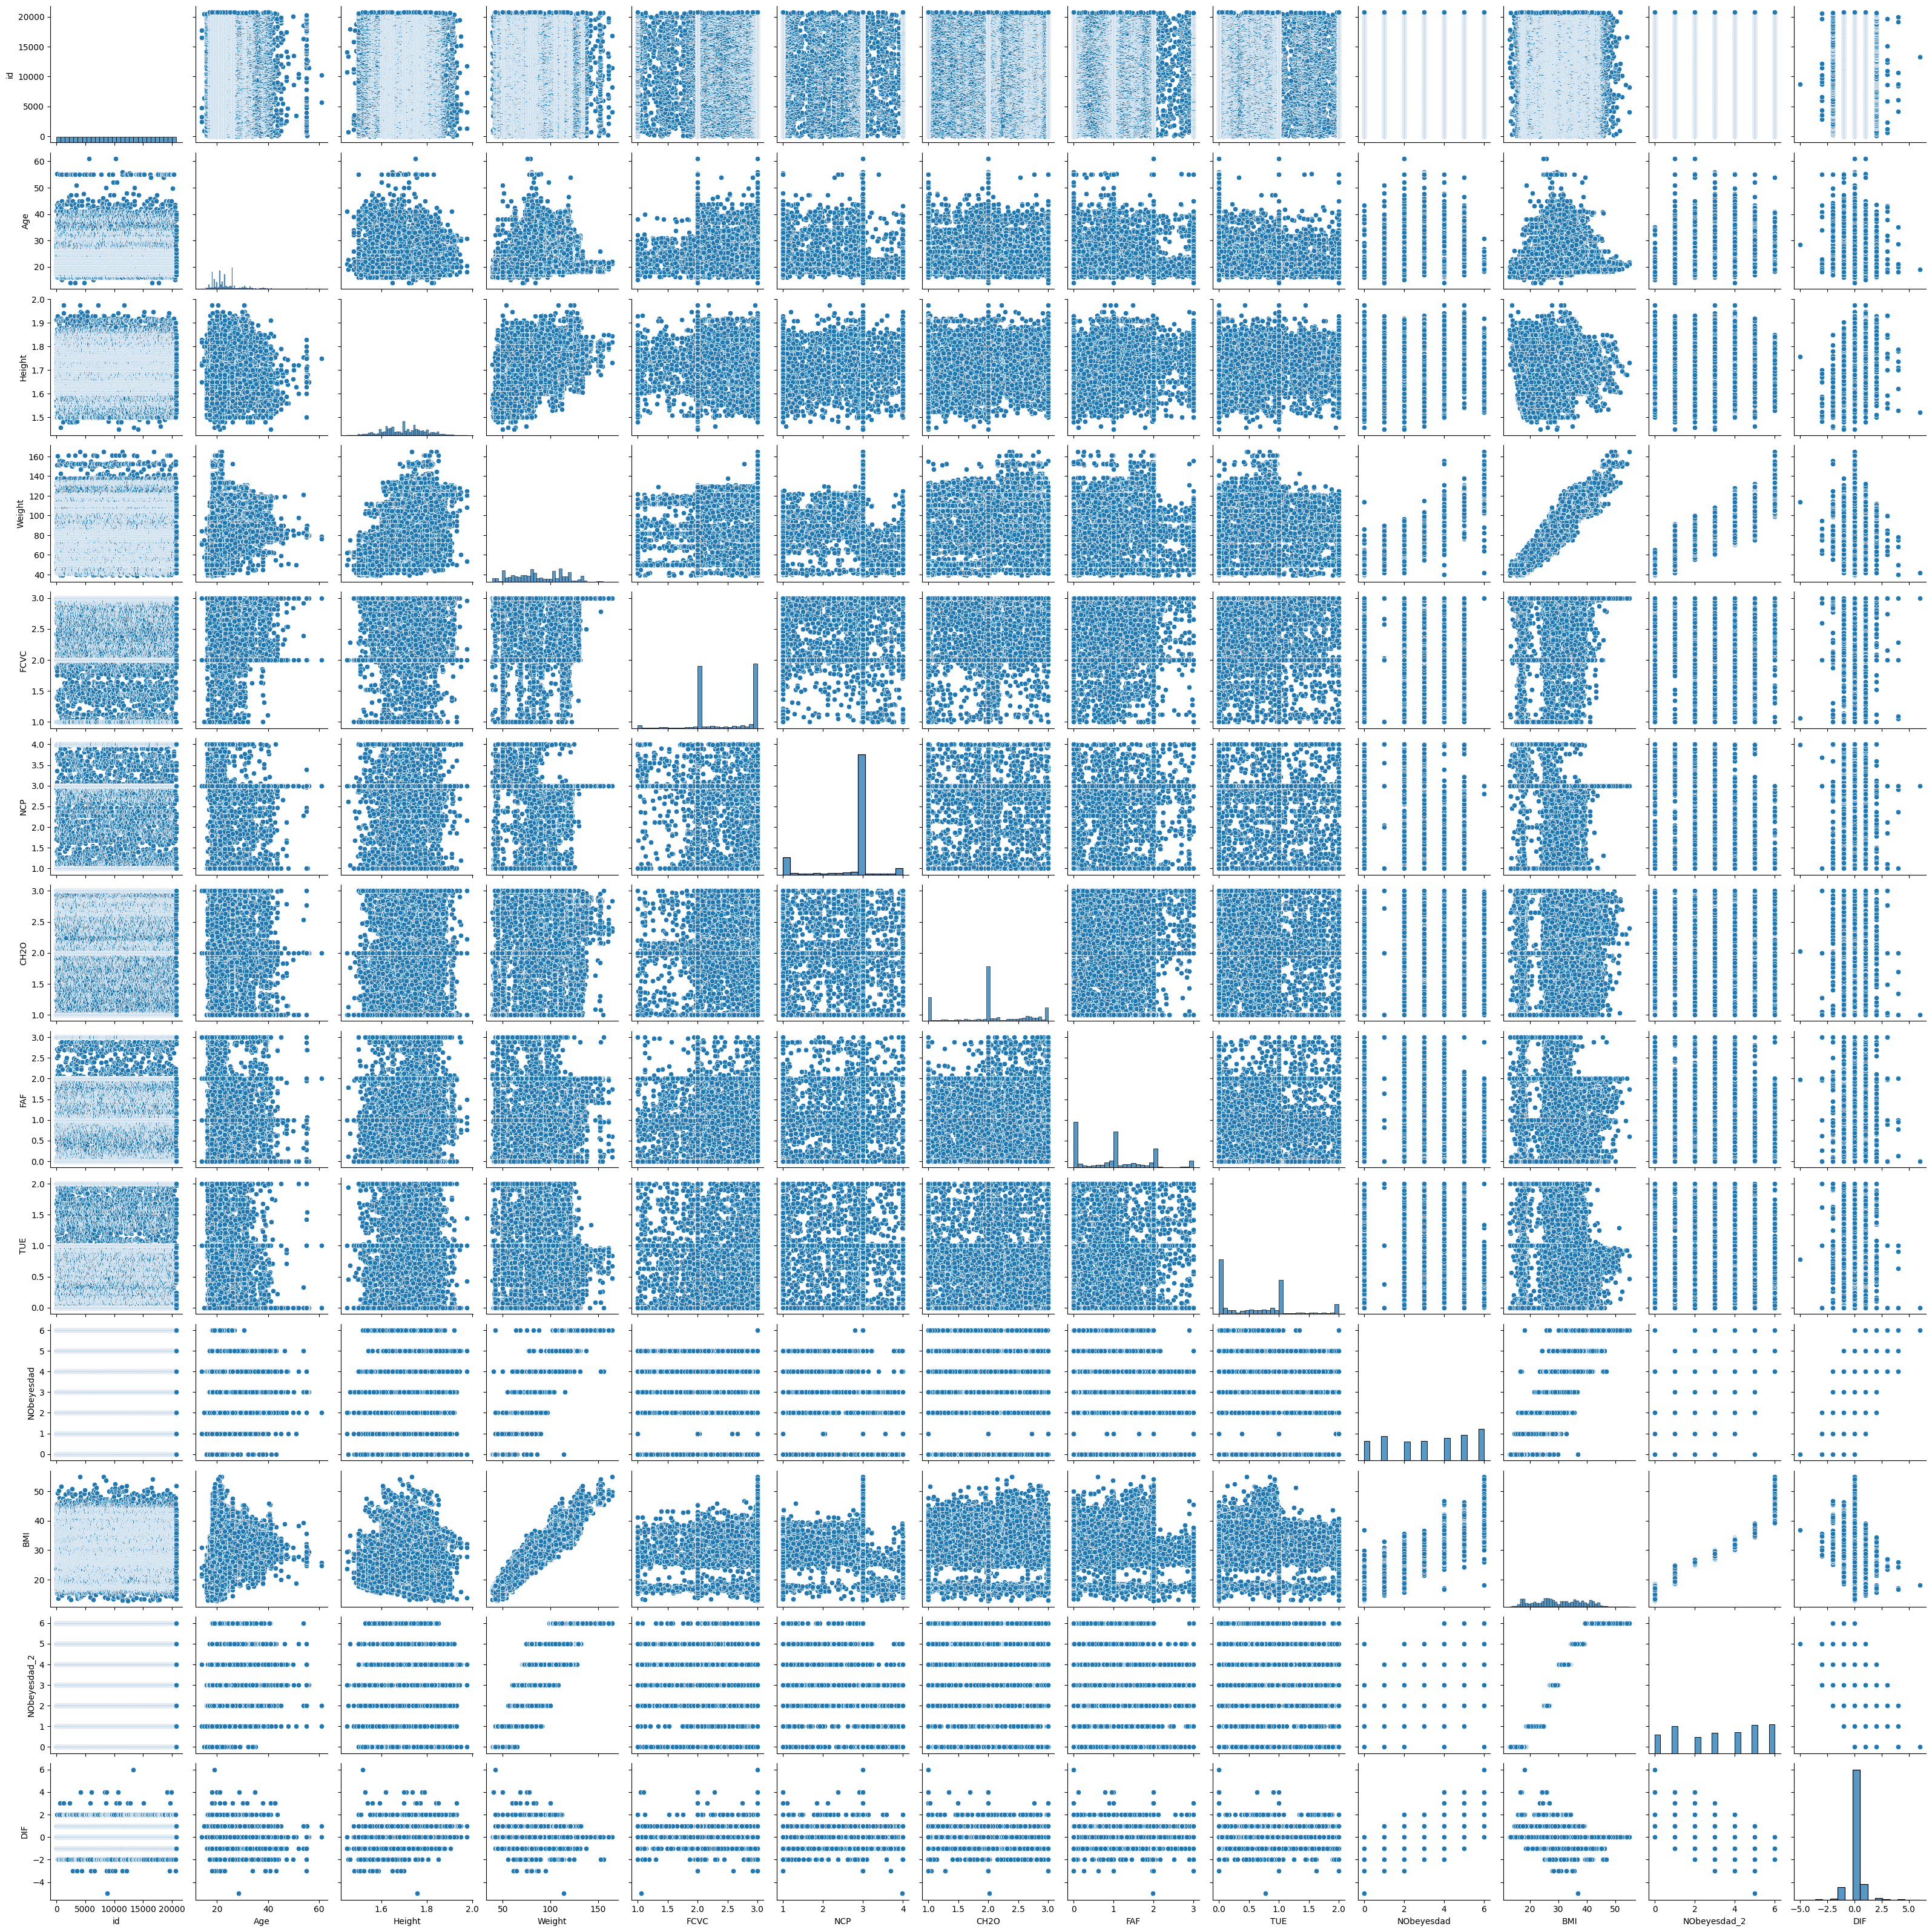

In [26]:
sns.pairplot(df_map)

We will treat differences higher or equal 3 as outliers

In [27]:
df_filt = df_map.query('DIF >= 3')

df_filt

id  Gender        Age    Height      Weight  \
584      584    Male  43.000000  1.770000   75.000000   
1224    1224    Male  23.000000  1.840000   84.000000   
2329    2329  Female  37.936044  1.593847   62.417228   
4160    4160  Female  20.803186  1.529834   40.202773   
5850    5850    Male  30.000000  1.700000   68.000000   
6111    6111  Female  18.000000  1.710000   50.000000   
8386    8386    Male  34.970367  1.780089   76.202761   
8626    8626    Male  18.000000  1.850000   84.000000   
8713    8713    Male  20.000000  1.700000   75.000000   
10324  10324    Male  19.000000  1.850000   85.000000   
10627  10627  Female  21.000000  1.620000   68.000000   
10897  10897  Female  18.000000  1.560000   60.000000   
12355  12355    Male  26.000000  1.930000  100.000000   
12378  12378    Male  41.000000  1.750000   75.000000   
12797  12797    Male  42.586285  1.754711   81.918809   
13312  13312  Female  19.000000  1.520000   42.000000   
15097  15097    Male  31.793937  1.931242   99.812443   
19137  19137    Male  28.712995  1.788239   78.000000   
19651  19651  Female  21.000000  1.540000   64.000000   
19932  19932  Female  18.000000  1.735659   50.000000   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
584                              yes  yes  2.000000  3.000000  Frequently   
1224                             yes   no  3.000000  3.000000   Sometimes   
2329                             yes  yes  2.746408  1.105617   Sometimes   
4160                             yes  yes  2.000000  1.000000   Sometimes   
5850                              no   no  2.000000  3.000000   Sometimes   
6111                             yes  yes  2.000000  3.000000  Frequently   
8386                             yes  yes  2.282803  2.900915   Sometimes   
8626                             yes  yes  2.000000  3.000000   Sometimes   
8713                             yes  yes  3.000000  3.000000   Sometimes   
10324                            yes   no  2.000000  3.000000   Sometimes   
10627                            yes  yes  3.000000  3.000000   Sometimes   
10897                            yes   no  2.000000  3.000000   Sometimes   
12355                            yes  yes  3.000000  1.000000   Sometimes   
12378                            yes  yes  2.000000  3.000000  Frequently   
12797                            yes  yes  2.159033  2.122545   Sometimes   
13312                            yes  yes  3.000000  3.000000  Frequently   
15097                            yes  yes  2.000000  1.851088   Sometimes   
19137                            yes  yes  1.052699  2.372705   Sometimes   
19651                            yes  yes  3.000000  3.000000   Sometimes   
19932                            yes  yes  1.096455  3.000000   Sometimes   

       ...      CH2O  SCC       FAF       TUE        CALC  \
584    ...  1.000000   no  1.000000  0.000000  Frequently   
1224   ...  3.000000  yes  3.000000  0.000000          no   
2329   ...  2.766674   no  0.899864  0.000000   Sometimes   
4160   ...  1.347559   no  0.127425  0.000000   Sometimes   
5850   ...  1.000000   no  0.000000  0.000000   Sometimes   
6111   ...  1.000000   no  1.000000  1.000000   Sometimes   
8386   ...  1.695510   no  0.964788  0.905181  Frequently   
8626   ...  3.000000   no  3.000000  0.000000  Frequently   
8713   ...  2.000000   no  2.000000  0.000000   Sometimes   
10324  ...  3.000000   no  2.000000  1.000000   Sometimes   
10627  ...  2.000000   no  1.000000  0.000000   Sometimes   
10897  ...  1.000000   no  0.000000  0.000000   Sometimes   
12355  ...  1.000000   no  1.000000  0.000000   Sometimes   
12378  ...  2.000000   no  3.000000  0.000000   Sometimes   
12797  ...  1.490613   no  0.994592  0.000000   Sometimes   
13312  ...  1.000000   no  0.000000  0.000000   Sometimes   
15097  ...  1.026729   no  1.984480  0.000000          no   
19137  ...  1.000000   no  0.958555  0.000000   Sometimes   
19651  ...  3.000000   no  2.000000

In [28]:
# Saving the outliers values
outliers = df_filt['id'].reset_index()
outliers = outliers.drop(columns = 'index')
outliers

id
0     584
1    1224
2    2329
3    4160
4    5850
5    6111
6    8386
7    8626
8    8713
9   10324
10  10627
11  10897
12  12355
13  12378
14  12797
15  13312
16  15097
17  19137
18  19651
19  19932

Now that we mapped the outliers, let's continue to separate the dataset

## Modeling

In [29]:
NUMERICAL_FEATURES = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
CATEGORICAL_FEATURES = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

FEATURES = NUMERICAL_FEATURES + CATEGORICAL_FEATURES
TARGET = 'NObeyesdad'

In [30]:
df_filtered = df_train[~df_train['id'].isin(outliers)]

X = df_filtered[FEATURES]
y = df_filtered[TARGET]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=23)

In [32]:
Gender_mappings = map_features(feature = 'Gender', comparison = 'BMI', df = df_BMI)

Family_mappings = map_features(feature = 'family_history_with_overweight', comparison = 'BMI', df = df_BMI)

FAVC_mappings = map_features(feature = 'FAVC', comparison = 'BMI', df = df_BMI)

CAEC_mappings = map_features(feature = 'CAEC', comparison = 'BMI', df = df_BMI)

SMOKE_mappings = map_features(feature = 'SMOKE', comparison = 'BMI', df = df_BMI)

SCC_mappings = map_features(feature = 'SCC', comparison = 'BMI', df = df_BMI)

CALC_mappings = map_features(feature = 'CALC', comparison = 'BMI', df = df_BMI)

MTRANS_mappings = map_features(feature = 'MTRANS', comparison = 'BMI', df = df_BMI)


def preprocessing(X):
    df_pre = X.copy()
    
    # Encoding Columns
    df_pre['Gender'] = df_pre['Gender'].map(Gender_mappings)
    df_pre['family_history_with_overweight'] = df_pre['family_history_with_overweight'].map(Family_mappings)
    df_pre['FAVC'] = df_pre['FAVC'].map(FAVC_mappings)
    df_pre['CAEC'] = df_pre['CAEC'].map(CAEC_mappings)
    df_pre['SMOKE'] = df_pre['SMOKE'].map(SMOKE_mappings)
    df_pre['SCC'] = df_pre['SCC'].map(SCC_mappings)
    df_pre['CALC'] = df_pre['CALC'].map(CALC_mappings)
    df_pre['MTRANS'] = df_pre['MTRANS'].map(MTRANS_mappings)
    
    return df_pre

#Object to map the features
class MapFeatures(OneHotEncoder):
    '''Map Features according to a variable'''
    def fit(self,X=None, y=None):
        return self

    
    
    def transform(self, X, y=None):
        return preprocessing(X)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

#categorical_transformer = MapFeatures()

categorical_transformer = OneHotEncoder(drop = 'if_binary', handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, NUMERICAL_FEATURES),
    ('cat', categorical_transformer, CATEGORICAL_FEATURES)
])

preprocessor.fit_transform(X_train)

Gender mapping: {'Male': 0, 'Female': 1}
family_history_with_overweight mapping: {'no': 0, 'yes': 1}
FAVC mapping: {'no': 0, 'yes': 1}
CAEC mapping: {'Frequently': 0, 'Always': 1, 'no': 2, 'Sometimes': 3}
SMOKE mapping: {'no': 0, 'yes': 1}
SCC mapping: {'yes': 0, 'no': 1}
CALC mapping: {'no': 0, 'Frequently': 1, 'Sometimes': 2}
MTRANS mapping: {'Walking': 0, 'Bike': 1, 'Motorbike': 2, 'Automobile': 3, 'Public_Transportation': 4}


num__Age  num__Height  num__Weight  num__FCVC  num__NCP  num__CH2O  \
4962   0.380190     0.581108     0.381619   0.606160  0.995147   0.183119   
3040   0.148936     0.437543     0.230054   0.500000  0.666667   0.500000   
7002   0.255319     0.364966     0.578135   1.000000  0.666667   0.816126   
1661   0.085106     0.380472     0.325249   0.500000  0.666667   0.500000   
8227   0.176277     0.758191     0.652126   1.000000  0.602099   0.366036   
...         ...          ...          ...        ...       ...        ...   
6175   0.534666     0.696830     0.376994   0.500000  0.291511   0.408026   
9704   0.191489     0.418519     0.230054   1.000000  0.666667   0.500000   
11190  0.406395     0.646787     0.513604   0.897543  0.567174   0.759920   
9256   0.085106     0.399495     0.150725   0.500000  0.666667   0.500000   
8787   0.182788     0.671999     0.347868   0.868314  0.666667   0.283683   

       num__FAF  num__TUE  cat__Gender_Male  \
4962   0.666667  0.293966               1.0   
3040   0.333333  0.000000               0.0   
7002   0.000000  0.331244               0.0   
1661   0.333333  0.500000               1.0   
8227   0.131151  0.267385               1.0   
...         ...       ...               ...   
6175   0.112265  0.000000               0.0   
9704   0.333333  1.000000               1.0   
11190  0.292034  0.532350               1.0   
9256   0.000000  0.500000               1.0   
8787   0.154317  0.500000               0.0   

       cat__family_history_with_overweight_yes  ...  cat__SMOKE_yes  \
4962                                       0.0  ...             0.0   
3040                                       1.0  ...             0.0   
7002                                       1.0  ...             0.0   
1661                                       1.0  ...             0.0   
8227                                       1.0  ...             0.0   
...                                        ...  ...             ...   
6175                                       0.0  ...             0.0   
9704                                       0.0  ...             0.0   
11190                                      1.0  ...             0.0   
9256                                       0.0  ...             0.0   
8787                                       1.0  ...             0.0   

       cat__SCC_yes  cat__CALC_Frequently  cat__CALC_Sometimes  cat__CALC_no  \
4962            0.0                   0.0                  1.0           0.0   
3040            0.0                   0.0                  1.0           0.0   
7002            0.0                   0.0                  1.0           0.0   
1661            0.0                   0.0                  1.0           0.0   
8227            0.0                   0.0                  1.0           0.0   
...             ...                   ...                  ...           ...   
6175            0.0                   0.0                  0.0           1.0   
9704            0.0                   0.0                  1.0           0.0   
11190           0.0                   0.0                  1.0           0.0   
9256            0.0                   0.0                  0.0           1.0   
8787            0.0                   0.0                  1.0           0.0   

       cat__MTRANS_Automobile  cat__MTRANS_Bike  cat__MTRANS_Motorbike  \
4962                      1.0               0.0                    0.0   
3040                      0.0               0.0                    0.0   
7002                      0.0               0.0                    0.0   
1661                      0.0               0.0                    0.0   
8227                      0.0               0.0                    0.0   
...                       ...               ...                    ...   
6175                      1.0               0.0                    0.0   
9704                      0.0               0.0                    0.0   
11190                     1.0        

In [33]:
model_pipeline = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('model', DummyClassifier())
])

In [34]:
params = {
    'model': (
        DummyClassifier(random_state = 23),
        RandomForestClassifier(random_state = 23),
        GradientBoostingClassifier(random_state = 23),
        LGBMClassifier(n_jobs = -1, random_state = 23),
    )
}

grid_model = GridSearchCV(model_pipeline, params, cv=5, scoring='accuracy', verbose=1)
grid_model.fit(X_train, y_train);

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [35]:
grid_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('model', GradientBoostingClassifier(random_state=23))])

In [36]:
df_cv_results = pd.DataFrame(grid_model.cv_results_).set_index('rank_test_score').sort_index()
df_cv_results.loc[:,~df_cv_results.columns.str.contains('split|time')]

param_model  \
rank_test_score                                                
1                GradientBoostingClassifier(random_state=23)   
2                            LGBMClassifier(random_state=23)   
3                    RandomForestClassifier(random_state=23)   
4                           DummyClassifier(random_state=23)   

                                                            params  \
rank_test_score                                                      
1                {'model': GradientBoostingClassifier(random_st...   
2                       {'model': LGBMClassifier(random_state=23)}   
3                {'model': RandomForestClassifier(random_state=...   
4                      {'model': DummyClassifier(random_state=23)}   

                 mean_test_score  std_test_score  
rank_test_score                                   
1                       0.900826        0.004010  
2                       0.899312        0.004840  
3                       0.890915        0.003570  
4                       0.196008        0.000169

In [37]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier())
])

params = {
    'model__learning_rate': [0.1, 0.2],
    'model__max_depth': [3, 4],
    'model__n_estimators': [110, 120],
    'model__subsample': [1., .8] 
}

grid_model = GridSearchCV(model_pipeline, params, cv=5, scoring='accuracy', n_jobs = -1, verbose=1)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Age',
                                                                          'Height',
                                                                          'Weight',
                                                                          'FCVC',
                                                                          'NCP',
                                                                          'CH2O',
                                                                          'FAF',
                                                                          'TUE']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'family_history_with_overweight',
                                                                          'FAVC',
                                                                          'CAEC',
                                                                          'SMOKE',
                                                                          'SCC',
                                                                          'CALC',
                                                                          'MTRANS'])])),
                                       ('model',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.1, 0.2],
                         'model__max_depth': [3, 4],
                         'model__n_estimators': [110, 120],
                         'model__subsample': [1.0, 0.8]},
             scoring='accuracy', verbose=1)

In [38]:
df_cv_results = pd.DataFrame(grid_model.cv_results_).set_index('rank_test_score').sort_index()
df_cv_results.loc[:,~df_cv_results.columns.str.contains('split|time')]

param_model__learning_rate param_model__max_depth  \
rank_test_score                                                     
1                                      0.1                      3   
2                                      0.2                      3   
3                                      0.2                      3   
4                                      0.1                      4   
5                                      0.1                      3   
5                                      0.1                      3   
7                                      0.1                      4   
7                                      0.2                      3   
9                                      0.1                      3   
10                                     0.2                      3   
11                                     0.1                      4   
12                                     0.1                      4   
13                                     0.2                      4   
14                                     0.2                      4   
15                                     0.2                      4   
16                                     0.2                      4   

                param_model__n_estimators param_model__subsample  \
rank_test_score                                                    
1                                     120                    0.8   
2                                     110                    1.0   
3                                     120                    1.0   
4                                     110                    0.8   
5                                     110                    1.0   
5                                     120                    1.0   
7                                     120                    0.8   
7                                     110                    0.8   
9                                     110                    0.8   
10                                    120                    0.8   
11                                    120                    1.0   
12                                    110                    1.0   
13                                    110                    1.0   
14                                    120                    1.0   
15                                    120                    0.8   
16                                    110                    0.8   

                                                            params  \
rank_test_score                                                      
1                {'model__learning_rate': 0.1, 'model__max_dept...   
2                {'model__learning_rate': 0.2, 'model__max_dept...   
3                {'model__learning_rate': 0.2, 'model__max_dept...   
4                {'model__learning_rate': 0.1, 'model__max_dept...   
5                {'model__learning_rate': 0.1, 'model__max_dept...   
5                {'model__learning_rate': 0.1, 'model__max_dept...   
7                {'model__learning_rate': 0.1, 'model__max_dept...   
7                {'model__learning_rate': 0.2, 'model__max_dept...   
9                {'model__learning_rate': 0.1, 'model__max_dept...   
10               {'model__learning_rate': 0.2, 'model__max_dept...   
11               {'model__learning_rate': 0.1, 'model__max_dept...   
12               {'model__learning_rate': 0.1, 'model__max_dept...   
13               {'model__learning_rate': 0.2, 'model__max_dept...   
14               {'model__learning_rate': 0.2, 'model__max_dept...   
15               {'model__learning_rate': 0.2, 'model__max_dept...   
16               {'model__learning_rate': 0.2, 'model__max_dept...   

                 mean_test_score  std_test_score  
rank_test_score                                   
1                       0.903510        0.004485  
2                       0.902959        0.005900  
3                       0.902822        0.004651  
4                       0.902271

In [39]:
model_pipeline = grid_model.best_estimator_

In [40]:
y_pred = model_pipeline.predict(X_test)
get_metrics(y_test, y_pred)

{'Accuracy': 0.9051059730250481, 'Balanced Accuracy': 0.8950066907059134}

<Axes: >

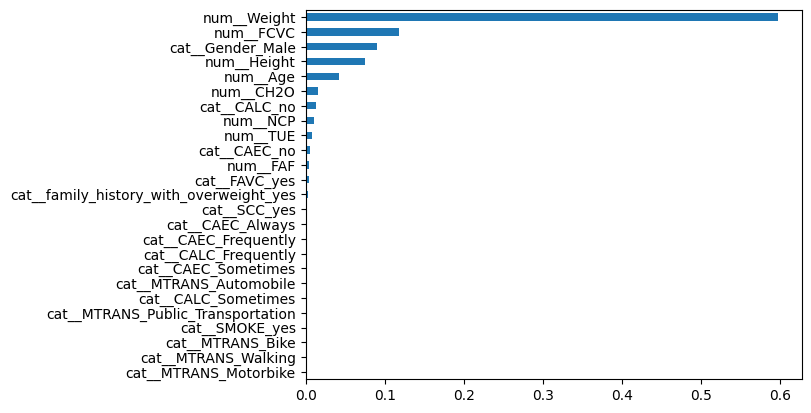

In [41]:
importances = pd.Series(
    data = model_pipeline.named_steps['model'].feature_importances_,
    index = model_pipeline.named_steps['preprocessor'].fit(X_train).get_feature_names_out()
)

importances.sort_values(ascending = True).plot.barh()

In [42]:
probabilities = model_pipeline.predict_proba(X_test)
print(probabilities[:5])

[[9.84952797e-04 6.18850319e-03 2.80719329e-02 1.82166825e-03
  3.65063664e-05 8.49498818e-02 8.77946555e-01]
 [9.78469768e-01 1.83565245e-02 2.29652947e-04 1.30617117e-04
  4.77483980e-05 2.24335215e-03 5.22336997e-04]
 [1.28707028e-03 3.71503709e-03 8.38010176e-01 4.31634025e-03
  5.87113599e-05 4.24020009e-02 1.10210664e-01]
 [1.31313827e-02 9.63814044e-01 2.14923197e-03 2.55084460e-04
  4.22805593e-05 1.15444128e-02 9.06356323e-03]
 [6.29676946e-04 5.21517121e-03 9.09235446e-01 2.55111931e-03
  3.14119484e-05 3.99739580e-03 7.83397792e-02]]


In [43]:
with open('../models/model.pkl', 'wb') as file_model:
    pickle.dump(model_pipeline, file_model)